# import and preprocess data

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

#400 rows max without throwing memory error
x0 = pd.read_csv("ieee-fraud-detection/train_transaction.csv", nrows=400)
x1 = pd.read_csv("ieee-fraud-detection/train_identity.csv", nrows=400)

dataset = pd.merge(x0, x1, on='TransactionID', how='left')



# visualize data

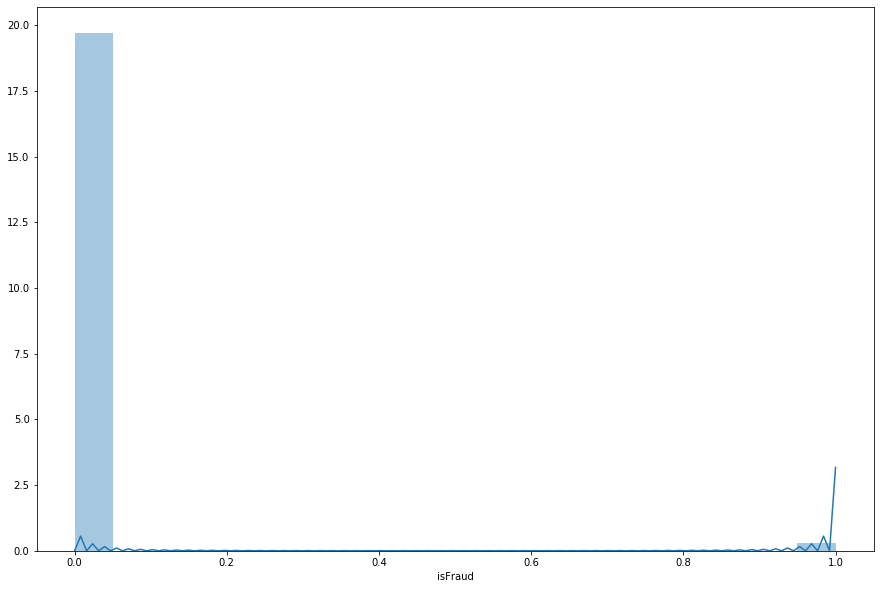

In [2]:
dataset = dataset.fillna(0)
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['isFraud'])

# train and run model

In [3]:
features = ['TransactionAmt'] 
target = ['isFraud']

X = dataset[features]
y = dataset[target]


In [4]:


def normalize(df):
    for feature in df.columns:
        df[feature] -=  df[feature].mean()
        df[feature] /=  df[feature].std()
    return df

# Define the model
model = LogisticRegression(solver='lbfgs')  

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # show the results
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.00      0.00      0.00         3

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\users\derek sauri\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\derek sauri\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\derek sauri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\uti